In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
data =  pd.read_csv("./weatherAUS.csv")
data.head()

data["RainTomorrow"].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [4]:
X = data.drop("RainTomorrow", axis=1)
Y = data["RainTomorrow"]

X.shape, Y.shape


((145460, 22), (145460,))

In [5]:
# len(X)

In [6]:
# X.isna().sum()

In [7]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
# data.dtypes

In [9]:
data['Date'] = pd.to_datetime(data['Date'])

# Extract useful time features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [10]:
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

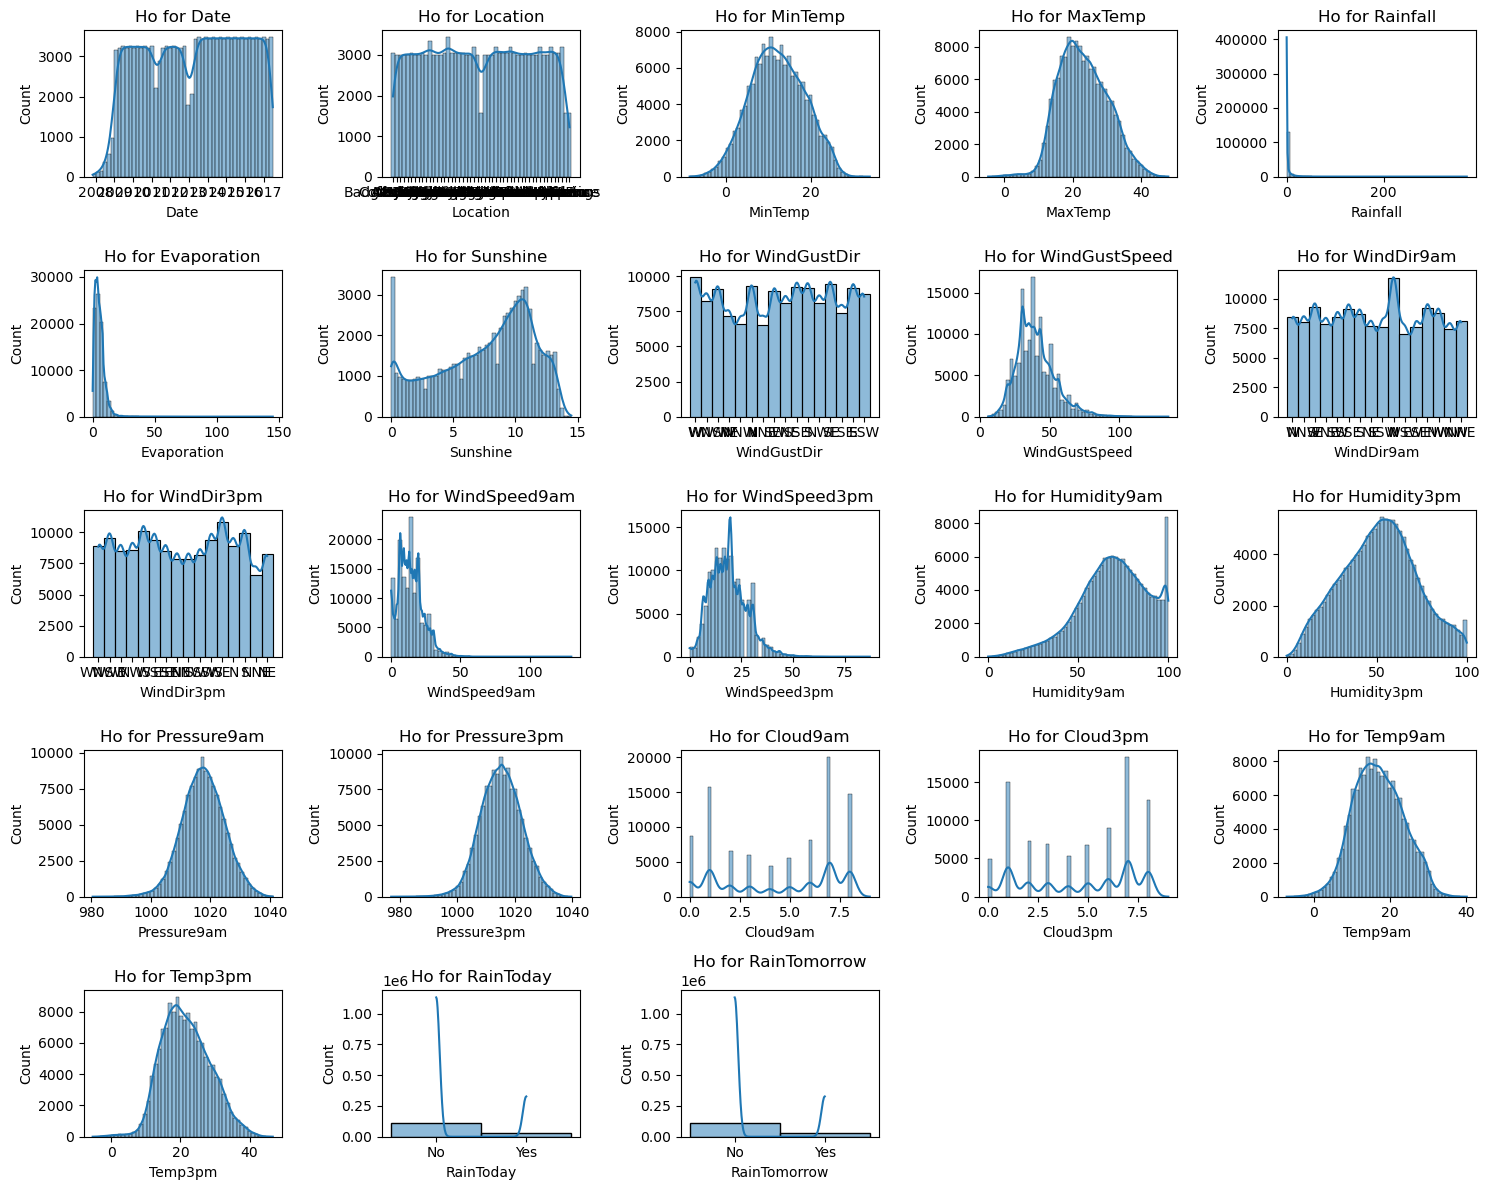

In [11]:
plt.figure(figsize=(15, 12))
num = 1
for  col in ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
                'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
                'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
                'Temp3pm', 'RainToday', 'RainTomorrow']:
    plt.subplot(5, 5, num) 
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(f"Ho for {col}")
    num+=1

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [12]:
# data.head()

In [13]:


# // Skewed Ho for Rainfall, Evaporation, WindsurSpeed, WindSpeed9am, windSpeed3pm, Humiidyt9pam
skewed_columns = ['Rainfall', 'Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm','Humidity9am']

for col in skewed_columns:
    data[col] = data[col].fillna(data[col].median())

# //Normal Ho for MinTemo, Ho for MaxTemp, Ho for sumshine, 
normal_columns = ['MinTemp', 'MaxTemp','Sunshine', 'Humidity3pm','Pressure9am','Pressure3pm', 'Temp9am','Temp3pm','Cloud9am','Cloud3pm']
# WindGustDir, WindDir9am, WindDir3pm        

for col in normal_columns:
   data[col] = data[col].fillna(data[col].mean())


text_columns = ['WindGustDir','WindDir9am', 'WindDir3pm']
for col in text_columns:
   data[col] = data[col].fillna('missing')


yes_no = ['RainToday']
for col in yes_no:
   data[col] = data[col].fillna(data[col].mode()[0])


In [14]:
data.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow     3267
Year                0
Month               0
Day                 0
dtype: int64

In [15]:
data = data.dropna(subset=["RainTomorrow"])
data.shape

(142193, 26)

In [16]:
print("Missing values after mapping:", data["RainToday"].isna().sum())


Missing values after mapping: 0


In [17]:
# CONVERT BINARY INTO 0 OR 1
data["RainToday"] = data["RainToday"].str.strip().str.capitalize()

data["RainToday"] = data["RainToday"].map({'Yes': 1, 'No': 0})

data["RainToday"].value_counts()

data["RainTomorrow"] = data["RainTomorrow"].str.strip().str.capitalize()

data["RainTomorrow"] = data["RainTomorrow"].map({'Yes':1, 'No':0})

In [18]:
data.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                 int64
RainTomorrow              int64
Year                      int32
Month                     int32
Day                       int32
dtype: object

In [19]:
categorical_features = ['WindGustDir','WindDir9am','WindDir3pm','Location']

dummies = pd.get_dummies(
    data=data[categorical_features],
    dtype=float
)

# dummies.columns

# Drop original categorical columns
data = data.drop(columns=categorical_features)

# Concatenate dummies with the original dataset
data = pd.concat([data, dummies], axis=1)

# Print updated columns
print(data.columns)

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       ...
       'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru',
       'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia',
       'Location_Williamtown', 'Location_Witchcliffe', 'Location_Wollongong',
       'Location_Woomera'],
      dtype='object', length=122)


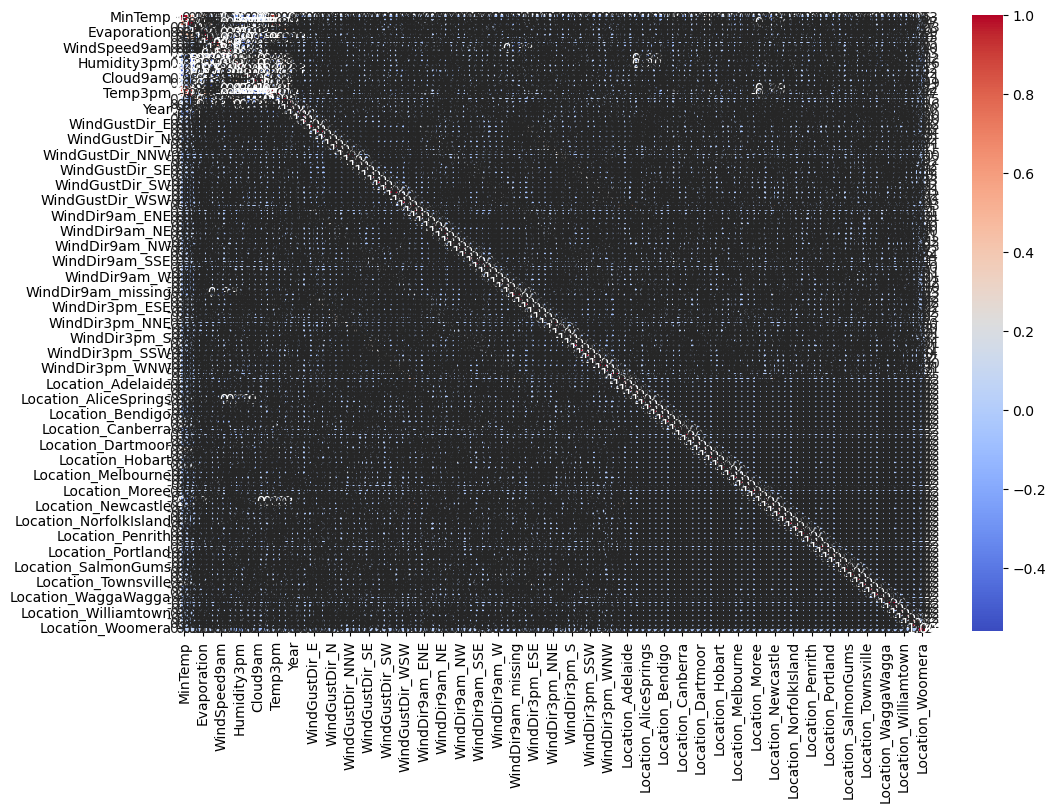

In [20]:
plt.figure(figsize=(12,8))
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(),annot=True,cmap='coolwarm', fmt=".2f")
plt.show()

In [21]:
numeric_data = data.select_dtypes(include=['number'])

# Set threshold for high correlation
corr_threshold = 0.9

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Get the absolute correlation matrix
corr_matrix_abs = corr_matrix.abs()

# Identify highly correlated features
high_corr_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix_abs.iloc[i, j] > corr_threshold:  # Fixed issue here
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

print("Features to remove due to high correlation:", high_corr_features)

data.drop(columns=high_corr_features, inplace=True)

Features to remove due to high correlation: {'Temp3pm', 'Pressure3pm'}


In [22]:
from sklearn.preprocessing import StandardScaler

num_features = data.select_dtypes(include=['number']).columns.to_list()
num_features.remove("RainTomorrow")

scaler = StandardScaler()
data[num_features] = scaler.fit_transform(data[num_features])

In [23]:
data.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       ...
       'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru',
       'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia',
       'Location_Williamtown', 'Location_Witchcliffe', 'Location_Wollongong',
       'Location_Woomera'],
      dtype='object', length=120)

In [24]:
x =  data.drop('RainTomorrow', axis=1)
y = data["RainTomorrow"]

x.shape, y.shape

((142193, 119), (142193,))

In [25]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.3)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((99535, 119), (42658, 119), (99535,), (42658,))

In [26]:
x_train.drop(columns=["Date"],inplace=True)
x_test.drop(columns=["Date"],inplace=True)


In [27]:
x_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru',
       'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia',
       'Location_Williamtown', 'Location_Witchcliffe', 'Location_Wollongong',
       'Location_Woomera'],
      dtype='object', length=118)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

scores  =  {}

for name,model in models.items():
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    scores[name] = score

scores

{'Logistic Regression': 0.8442261709409724,
 'KNN': 0.8040695766327536,
 'Random Forest': 0.8543063434760185}

In [33]:
from sklearn.model_selection import RandomizedSearchCV


knn =  KNeighborsClassifier()
params = {
    'n_neighbors': range(1,20,2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_grid = RandomizedSearchCV(
    knn,
    param_distributions=params,
    cv=5,
    n_jobs=1,
    scoring='accuracy',
)

knn_grid.fit(x_train, y_train)
knn_grid.score(x_test, y_test)
knn_grid.best_params_


{'weights': 'distance', 'n_neighbors': 15, 'metric': 'manhattan'}

In [32]:
from scipy.stats import loguniform

logisticReg =  LogisticRegression()
params = {
    'C': loguniform(1e-4, 1e4),  # Continuous distribution for regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg'],  # Optimizers
    'max_iter': [100, 200, 300, 500],  # Iterations for convergence
    'tol': [1e-4, 1e-3, 1e-2, 1e-1],  # Tolerance for stopping criteria
    'class_weight': ['balanced', None]  # Handling class imbalance
}
log_grid = RandomizedSearchCV(
    logisticReg,
    param_distributions=params,
    cv=5,
    n_jobs=1,
    scoring='accuracy',
)

log_grid.fit(x_train, y_train)
log_grid.score(x_test, y_test)
log_grid.best_params_



c:\Users\sande\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sande\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sande\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\sande\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\sande\anaconda3\Lib\site-packages\s

{'C': 0.020451570832417266,
 'class_weight': None,
 'max_iter': 500,
 'penalty': 'l2',
 'solver': 'liblinear',
 'tol': 0.01}

In [ ]:
from scipy.stats import loguniform
from scipy.stats import randint
  
randomForest =  RandomForestClassifier()
params = {
    'n_estimators': randint(50, 300),  # Number of trees
    'max_depth': [None, 10, 20, 30, 40, 50],  # Tree depth
    'min_samples_split': randint(2, 10),  # Minimum samples to split
    'min_samples_leaf': randint(1, 10),  # Minimum samples per leaf
    'max_features': ['auto', 'sqrt', 'log2'],  # Features considered for split
    'bootstrap': [True, False],  # Sampling method
    'criterion': ['gini', 'entropy'],  # Splitting criterion
}
randomForest_gried = RandomizedSearchCV(
    randomForest,
    param_distributions=params,
    cv=5,
    n_jobs=1,
    scoring='accuracy',
)

randomForest_gried.fit(x_train, y_train)
randomForest_gried.score(x_test, y_test)
randomForest_gried.best_params_



c:\Users\sande\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sande\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sande\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\sande\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\sande\anaconda3\Lib\site-packages\

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 223}

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train Logistic Regression
log_reg = LogisticRegression(C=0.02045, class_weight=None, max_iter=500, 
                             penalty='l2', solver='liblinear', tol=0.01)
log_reg.fit(x_train, y_train)

# Train Random Forest
rf = RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=None, 
                            max_features='sqrt', min_samples_leaf=2, 
                            min_samples_split=4, n_estimators=223)
rf.fit(x_train, y_train)

# Train KNN
knn = KNeighborsClassifier(weights='distance', n_neighbors=15, metric='manhattan')
knn.fit(x_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance')

In [ ]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

# Evaluate each model
log_reg_metrics = evaluate_model(log_reg, x_test, y_test)
rf_metrics = evaluate_model(rf, x_test, y_test)
knn_metrics = evaluate_model(knn, x_test, y_test)

# Print results
print("Logistic Regression:", log_reg_metrics)
print("Random Forest:", rf_metrics)
print("KNN:", knn_metrics)


Logistic Regression: {'Accuracy': 0.8445309203431947, 'Precision': 0.7160735826296744, 'Recall': 0.5, 'F1 Score': 0.5888406695598264, 'ROC AUC': 0.8649414637733396}
Random Forest: {'Accuracy': 0.8555722256083267, 'Precision': 0.7733901359986892, 'Recall': 0.49694672562644765, 'F1 Score': 0.605089417345042, 'ROC AUC': 0.8850802902191839}
KNN: {'Accuracy': 0.8215575038679732, 'Precision': 0.7204301075268817, 'Recall': 0.3244893661823542, 'F1 Score': 0.44744483159117304, 'ROC AUC': 0.8218071273210715}


In [39]:
import joblib
joblib.dump(rf, 'random_forest_model.pkl')
print("Model saved successfully!")


Model saved successfully!


In [40]:
rf_model_load= joblib.load('random_forest_model.pkl')

y_test =  rf_model_load.predict(x_test)

y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)